In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.models import Sequential

In [2]:
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

In [3]:
X, Y = load_coffee_data()
print(X.shape, Y.shape)

(200, 2) (200, 1)


In [11]:
pos = Y == 1
neg = Y == 0
pos = pos.reshape(-1)
neg = neg.reshape(-1)

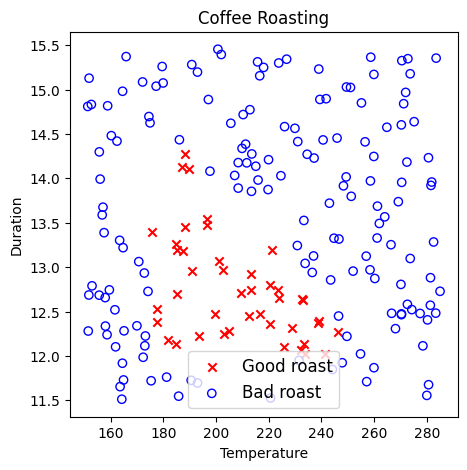

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(X[pos,0], X[pos,1], marker = 'x', color = 'red', label = 'Good roast')
ax.scatter(X[neg,0], X[neg,1], marker = 'o', color = 'blue', facecolor = 'none', label = 'Bad roast')
ax.legend(fontsize='large')
ax.set_ylabel('Duration')
ax.set_xlabel('Temperature')
ax.set_title('Coffee Roasting')
plt.show()

## Normalize Data

In [17]:
print(f"Temperature Max, Min before normalization : {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration Max, Min before normalization : {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X)
print(f"Temperature Max, Min after normalization : {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration Max, Min after normalization : {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min before normalization : 284.99, 151.32
Duration Max, Min before normalization : 15.45, 11.51
Temperature Max, Min after normalization : 1.66, -1.69
Duration Max, Min after normalization : 1.79, -1.70


## Numpy Model (Forward Prop in Numpy)

In [18]:
def sigmoid(z):    
    g = 1/(1+np.exp(-z))
    return g

In [19]:
def my_dense(a_in, W, b):
    """Computes dense layer

    Args:
        a_in (ndarray (n,)): Data, 1 example
        W (ndarray (n,j)): Weight matrix, n features per unit, j units
        b (ndarray (j,)): bias vector, j units
    Returns:
        a_out (ndarray (j,)) : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:,j]
        z = np.dot(a_in, w) + b[j]
        a_out[j] = sigmoid(z)
        
    return a_out

In [20]:
def my_sequential(x, W1, b1, W2, b2):
    a1 = my_dense(x, W1, b1)
    a2 = my_dense(a1, W2, b2)
    return a2

In [21]:
W1_tmp = np.array([
    [-8.93, 0.29, 12.9],
    [-0.1, -7.32, 10.81]
])
b1_tmp = np.array([-9.82, -9.28, 0.96])

W2_tmp = np.array([
    [-31.18],
    [-27.59],
    [-32.56]
])

b2_tmp = np.array([15.41])

In [22]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for  i in range(m):
        p[i,0] = my_sequential(X[i], W1, b1, W2, b2)
    return p

In [23]:
X_tst = np.array([
    [200,13.9],
    [200,17]
])

X_tstn = norm_l(X_tst)
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

/var/folders/yr/_jfv6k1d3mbbs2syv46tt1y80000gn/T/ipykernel_19565/2265355902.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i,0] = my_sequential(X[i], W1, b1, W2, b2)


In [24]:
predictions

array([[9.71931351e-01],
       [3.28978710e-08]])

In [25]:
y_hat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        y_hat[i] = 1
    else:
        y_hat[i] = 0
print(f"decisions = \n{y_hat}")

decisions = 
[[1.]
 [0.]]


This can be accomplished more succintly

In [26]:
y_hat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{y_hat}")

decisions = 
[[1]
 [0]]


## Followed along coffee roasting example in numpy